In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('kin8nm')

In [3]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 500, hidden_layers = [100, 100, 100], learning_rate = 0.0015, exp_decay = .995, calibration_threshold = .03)

initial loss:  4.013358116149902
cal loss:  1.4480891227722168 cal error: 1.3134153990862671 nllk loss:  tensor(0.4902, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1744, grad_fn=<MeanBackward0>)
cal loss:  0.9869558215141296 cal error: 0.5146345606019889 nllk loss:  tensor(-0.3139, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5617, grad_fn=<MeanBackward0>)
cal loss:  0.5047382116317749 cal error: 1.1032830153184625 nllk loss:  tensor(0.1009, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3347, grad_fn=<MeanBackward0>)
cal loss:  0.86378413438797 cal error: 1.6835885514646602 nllk loss:  tensor(0.6441, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3516, grad_fn=<MeanBackward0>)
cal loss:  0.6410237550735474 cal error: 0.7326730448804085 nllk loss:  tensor(-0.1541, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3299, grad_fn=<MeanBackward0>)
cal loss:  0.5509850978851318 cal error: 0.31569080892233276 nllk loss:  tensor(-0.5846, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2377, 

cal loss:  0.2869705855846405 cal error: 0.17154447729105082 nllk loss:  tensor(-1.1363, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1460, grad_fn=<MeanBackward0>)
cal loss:  0.20487582683563232 cal error: 0.15818965331900026 nllk loss:  tensor(-1.1998, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1594, grad_fn=<MeanBackward0>)
cal loss:  0.3001765310764313 cal error: 0.14483235689330826 nllk loss:  tensor(-1.2629, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1438, grad_fn=<MeanBackward0>)
cal loss:  0.21765469014644623 cal error: 0.13173985487772105 nllk loss:  tensor(-1.3245, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1536, grad_fn=<MeanBackward0>)
cal loss:  0.12038542330265045 cal error: 0.1205991400161247 nllk loss:  tensor(-1.3932, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1196, grad_fn=<MeanBackward0>)
cal loss:  0.26841193437576294 cal error: 0.10521150228433214 nllk loss:  tensor(-1.4615, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0967, grad_fn=<MeanBackwar

cal loss:  0.06198671832680702 cal error: 0.0081068261220102 nllk loss:  tensor(-2.1250, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0972, grad_fn=<MeanBackward0>)
cal loss:  0.07262662053108215 cal error: 0.1326711099166891 nllk loss:  tensor(-2.1282, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0972, grad_fn=<MeanBackward0>)
cal loss:  0.046793628484010696 cal error: 0.00882717011556031 nllk loss:  tensor(-2.1263, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1064, grad_fn=<MeanBackward0>)
cal loss:  0.09018418192863464 cal error: 0.15356500940607368 nllk loss:  tensor(-2.1248, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0951, grad_fn=<MeanBackward0>)
cal loss:  0.04012556001543999 cal error: 0.012470464928782574 nllk loss:  tensor(-2.1181, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0866, grad_fn=<MeanBackward0>)
cal loss:  0.060538019984960556 cal error: 0.18287344799785007 nllk loss:  tensor(-2.1125, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0914, grad_fn=<MeanBac

cal loss:  0.09192056953907013 cal error: 0.17882590701424353 nllk loss:  tensor(-2.3227, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0859, grad_fn=<MeanBackward0>)
cal loss:  0.0338103249669075 cal error: 0.021602499328137573 nllk loss:  tensor(-2.3200, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0844, grad_fn=<MeanBackward0>)
cal loss:  0.07241225242614746 cal error: 0.196954152109648 nllk loss:  tensor(-2.3176, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0720, grad_fn=<MeanBackward0>)
cal loss:  0.09643322229385376 cal error: 0.029771486159634493 nllk loss:  tensor(-2.3094, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0708, grad_fn=<MeanBackward0>)
cal loss:  0.10938426852226257 cal error: 0.22334842784197803 nllk loss:  tensor(-2.3076, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0848, grad_fn=<MeanBackward0>)
cal loss:  0.027137843891978264 cal error: 0.03444453104004298 nllk loss:  tensor(-2.3092, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0858, grad_fn=<MeanBack

cal loss:  0.04538803547620773 cal error: 0.04891572158022034 nllk loss:  tensor(-2.5214, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0795, grad_fn=<MeanBackward0>)
cal loss:  0.0667342022061348 cal error: 0.2554354205858641 nllk loss:  tensor(-2.5092, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0726, grad_fn=<MeanBackward0>)
cal loss:  0.03136276826262474 cal error: 0.058417011556033294 nllk loss:  tensor(-2.5126, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0750, grad_fn=<MeanBackward0>)
cal loss:  0.05659136548638344 cal error: 0.2557995968825585 nllk loss:  tensor(-2.5164, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0798, grad_fn=<MeanBackward0>)
cal loss:  0.04768010228872299 cal error: 0.05413746304756781 nllk loss:  tensor(-2.5318, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0709, grad_fn=<MeanBackward0>)
cal loss:  0.030399883165955544 cal error: 0.2383215802203709 nllk loss:  tensor(-2.5381, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0793, grad_fn=<MeanBackwa

cal loss:  0.024845313280820847 cal error: 0.22763133566245636 nllk loss:  tensor(-2.7223, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0736, grad_fn=<MeanBackward0>)
cal loss:  0.019630087539553642 cal error: 0.053068637463047554 nllk loss:  tensor(-2.7369, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0686, grad_fn=<MeanBackward0>)
cal loss:  0.05371060594916344 cal error: 0.21705552270894926 nllk loss:  tensor(-2.7377, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0666, grad_fn=<MeanBackward0>)
cal loss:  0.02200610749423504 cal error: 0.04584431604407417 nllk loss:  tensor(-2.7591, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0749, grad_fn=<MeanBackward0>)
cal loss:  0.05989677831530571 cal error: 0.1884118247782855 nllk loss:  tensor(-2.7670, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0724, grad_fn=<MeanBackward0>)
cal loss:  0.0448882095515728 cal error: 0.03527487234614351 nllk loss:  tensor(-2.7876, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0661, grad_fn=<MeanBac

cal loss:  0.022619493305683136 cal error: 0.03768578339156138 nllk loss:  tensor(-2.9455, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0601, grad_fn=<MeanBackward0>)
cal loss:  0.04131723940372467 cal error: 0.1607038161784467 nllk loss:  tensor(-2.9414, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0702, grad_fn=<MeanBackward0>)
cal loss:  0.017500659450888634 cal error: 0.03838116097823165 nllk loss:  tensor(-2.9516, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0610, grad_fn=<MeanBackward0>)
cal loss:  0.014252705499529839 cal error: 0.1602 nllk loss:  tensor(-2.9477, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0708, grad_fn=<MeanBackward0>)
cal loss:  0.011650529690086842 cal error: 0.03770475678581023 nllk loss:  tensor(-2.9593, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0714, grad_fn=<MeanBackward0>)
cal loss:  0.03501907363533974 cal error: 0.15772176834184362 nllk loss:  tensor(-2.9555, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0676, grad_fn=<MeanBackward0>)
ca

cal loss:  0.02523232251405716 cal error: 0.10771349099704385 nllk loss:  tensor(-3.1162, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0568, grad_fn=<MeanBackward0>)
cal loss:  0.013728722929954529 cal error: 0.02336084385917762 nllk loss:  tensor(-3.1265, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0640, grad_fn=<MeanBackward0>)
cal loss:  0.018832312896847725 cal error: 0.09633778554152114 nllk loss:  tensor(-3.1303, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0575, grad_fn=<MeanBackward0>)
cal loss:  0.015383639372885227 cal error: 0.02162942757323299 nllk loss:  tensor(-3.1353, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0626, grad_fn=<MeanBackward0>)
cal loss:  0.010314536280930042 cal error: 0.09449373824240799 nllk loss:  tensor(-3.1372, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0571, grad_fn=<MeanBackward0>)
cal loss:  0.01961478590965271 cal error: 0.021701854340231093 nllk loss:  tensor(-3.1405, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0631, grad_fn=<Mea

cal loss:  0.008415956050157547 cal error: 0.01758113410373554 nllk loss:  tensor(-3.2564, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0581, grad_fn=<MeanBackward0>)
cal loss:  0.015359828248620033 cal error: 0.07169161515721584 nllk loss:  tensor(-3.2584, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0599, grad_fn=<MeanBackward0>)
cal loss:  0.011161775328218937 cal error: 0.016537436173071744 nllk loss:  tensor(-3.2627, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0591, grad_fn=<MeanBackward0>)
cal loss:  0.021092988550662994 cal error: 0.06973861865090031 nllk loss:  tensor(-3.2644, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0663, grad_fn=<MeanBackward0>)
cal loss:  0.014492422342300415 cal error: 0.016007336737436158 nllk loss:  tensor(-3.2676, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0600, grad_fn=<MeanBackward0>)
cal loss:  0.023015093058347702 cal error: 0.06902878258532656 nllk loss:  tensor(-3.2686, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0488, grad_fn=<

cal loss:  0.02304566092789173 cal error: 0.04856234883095944 nllk loss:  tensor(-3.3678, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0565, grad_fn=<MeanBackward0>)
cal loss:  0.0253469105809927 cal error: 0.012838457403923661 nllk loss:  tensor(-3.3696, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0655, grad_fn=<MeanBackward0>)
cal loss:  0.01336590014398098 cal error: 0.04819250201558722 nllk loss:  tensor(-3.3712, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0692, grad_fn=<MeanBackward0>)
cal loss:  0.014008679427206516 cal error: 0.01216869121203975 nllk loss:  tensor(-3.3747, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0635, grad_fn=<MeanBackward0>)
cal loss:  0.026996314525604248 cal error: 0.04594536414942221 nllk loss:  tensor(-3.3767, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0612, grad_fn=<MeanBackward0>)
cal loss:  0.022090617567300797 cal error: 0.011755415210964782 nllk loss:  tensor(-3.3793, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0565, grad_fn=<Mean

cal loss:  0.012560377828776836 cal error: 0.008904380542864812 nllk loss:  tensor(-3.4582, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0566, grad_fn=<MeanBackward0>)
cal loss:  0.026190701872110367 cal error: 0.03174961031980653 nllk loss:  tensor(-3.4600, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0619, grad_fn=<MeanBackward0>)
cal loss:  0.009443738497793674 cal error: 0.008588685837140541 nllk loss:  tensor(-3.4622, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0613, grad_fn=<MeanBackward0>)
cal loss:  0.005757421720772982 cal error: 0.03181515721580221 nllk loss:  tensor(-3.4632, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0577, grad_fn=<MeanBackward0>)
cal loss:  0.012906561605632305 cal error: 0.008907067992475122 nllk loss:  tensor(-3.4645, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0569, grad_fn=<MeanBackward0>)
cal loss:  0.011467428877949715 cal error: 0.03189634506852999 nllk loss:  tensor(-3.4657, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0614, grad_fn=

End2end test MAPE:  0.16639727
End2end test RMSE:  0.11681896
End2end test NLLK:  -3.2212198
End2end test CRPS:  tensor(0.0653)


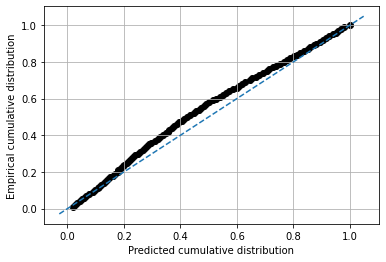

End2end test calibration error when step size is 0.001:  2.3142787291292706
End2end test calibration error when step size is 0.01:  0.2323273035034678
End2end test calibration error when step size is 0.1:  0.022795297756362236


In [4]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [5]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 10.90it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 10.72it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:01<00:00,  7.86it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.091
  RMSE          0.117
  MDAE          0.073
  MARPD         15.391
  R2            0.800
  Correlation   0.896
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.010
  Mean-absolute Calibration Error       0.009
  Miscalibration Area                   0.009
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.037
     Group Size: 0.56 -- Calibration Error: 0.018
     Group Size: 1.00 -- Calibration Error: 0.009
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.045
     Group Size: 0.56 -- Calibration Error: 0.020
     Group Size: 1.00 -- Calibration Error: 0.010
===============

Lims is None. Setting lims now:
min_max_true: (0.06322076, 1.4585207)
min_max_pred: (0.04794168, 1.4446623)
lims: (0.04794168, 1.4585207)
lims_ext: (-0.09311621561646463, 1.5995785474777222)


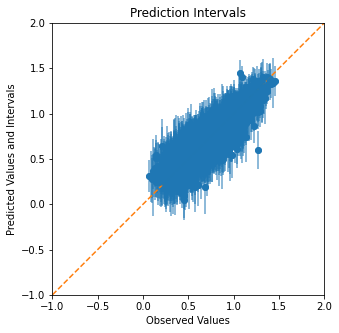

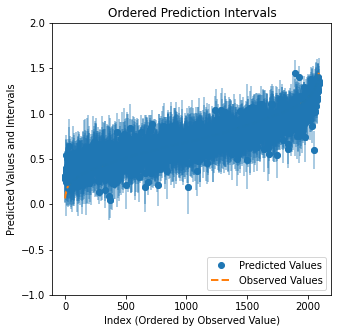

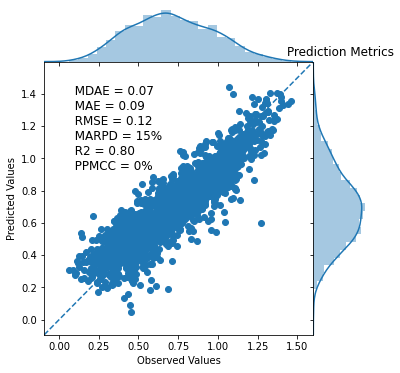

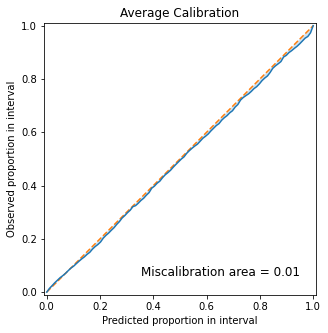

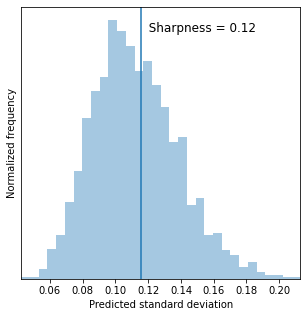

In [6]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))